<a href="https://colab.research.google.com/github/MOHDDANISHKHAN06/MediaPipe/blob/main/asl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow mediapipe


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 38.8 MB/s eta 0:00:00


In [6]:
!python --version
!pip install --upgrade pip
!pip install mediapipe-model-maker


Python 3.10.12
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Obtaining dependency information for mediapipe-model-maker from https://files.pythonhosted.org/packages/9a/f4/26b03c5b5cacd9bcbaf06a906915f56d6b7cd7276c28c246db4a42c1f35b/mediapipe_model_maker-0.2.1.3-py3-none-any.whl.metadata
  Obtaining dependency information for mediapipe>=0.10.0 from https://files.pythonhosted.org/packages/4a/58/1ec1516ee0f3e9f8073bf72a4c1653712b737068584a8cc91d1906d13a10/mediapipe-0.10.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for tensorflow-addons from https://files.pythonhosted.org/packages/12/34/221b939127e629c1ebbfb8a0281f67b084515ed53e5042582238817bcc54/tensorflow_addons-0.21.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining depend

In [ ]:
# Upload the dataset to Google Colab
from google.colab import files
uploaded = files.upload()


Saving AnnotatedImages.zip to AnnotatedImages.zip


In [ ]:
#dataset is "AnnotatedImages.zip"
!unzip AnnotatedImages.zip

DATASET_PATH = "/content/AnnotatedImages/Alphabets"
MODEL_OUTPUT_PATH = "/content"


In [ ]:
import os
import tensorflow as tf
assert tf.__version__.startswith('2')

from mediapipe_model_maker import image_classifier

import matplotlib.pyplot as plt

# Create a dataset
data = image_classifier.Dataset.from_folder(DATASET_PATH)
train_data, remaining_data = data.split(0.8)
test_data, validation_data = remaining_data.split(0.5)

# Set retraining options
spec = image_classifier.SupportedModels.MOBILENET_V2
hparams = image_classifier.HParams(export_dir=MODEL_OUTPUT_PATH)
options = image_classifier.ImageClassifierOptions(supported_model=spec, hparams=hparams)

# Start the retraining
model = image_classifier.ImageClassifier.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

# Evaluate the model
loss, acc = model.evaluate(test_data)
print(f'Test loss: {loss}, Test accuracy: {acc}')

# Export the model
model.export_model()

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 26)                33306     
                                                                 
Total params: 2291290 (8.74 MB)
Trainable params: 33306 (130.10 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________
None
Epoch 1/10
2600/2600 [==============================] - 236s 89ms/step - loss: 3.5146 - accuracy: 0.0454 - val_loss: 3.1286 - val_accuracy: 0.0892
Epoch 2/10
2600/2600 [==============================] - 231s 89ms/step - loss: 3.0432 - accuracy: 0.1656 - val_loss: 2.4776 - 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
from google.colab import files
uploaded = files.upload()

for filename in uploaded:
  content = uploaded[filename]
  with open(filename, 'wb') as f:
    f.write(content)
IMAGE_FILENAMES = list(uploaded.keys())

print('Uploaded files:', IMAGE_FILENAMES)

Saving b-20.jpg to b-20 (1).jpg
Saving b-18.jpg to b-18 (1).jpg
Saving c-19.jpg to c-19 (1).jpg
Saving c-18.jpg to c-18 (1).jpg
Saving z-25.jpg to z-25 (1).jpg
Saving z-24.jpg to z-24 (1).jpg
Saving a-2.jpg to a-2 (1).jpg
Saving a-1.jpg to a-1 (1).jpg
Uploaded files: ['b-20 (1).jpg', 'b-18 (1).jpg', 'c-19 (1).jpg', 'c-18 (1).jpg', 'z-25 (1).jpg', 'z-24 (1).jpg', 'a-2 (1).jpg', 'a-1 (1).jpg']


b-20 (1).jpg


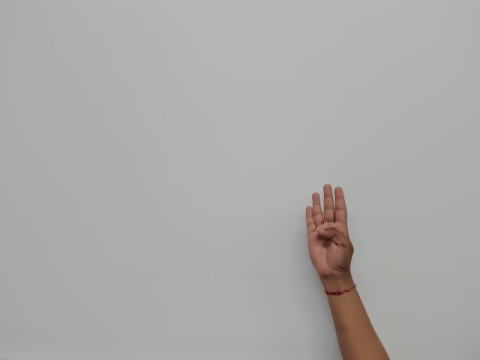

b-18 (1).jpg


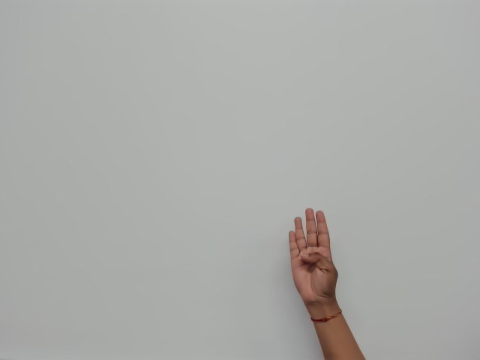

c-19 (1).jpg


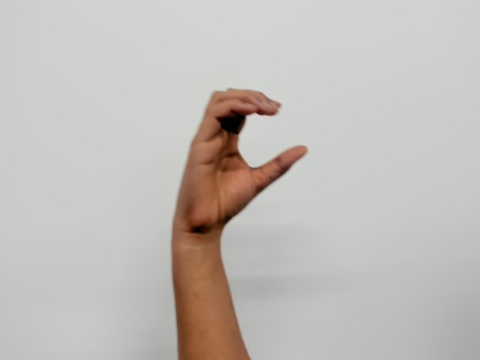

c-18 (1).jpg


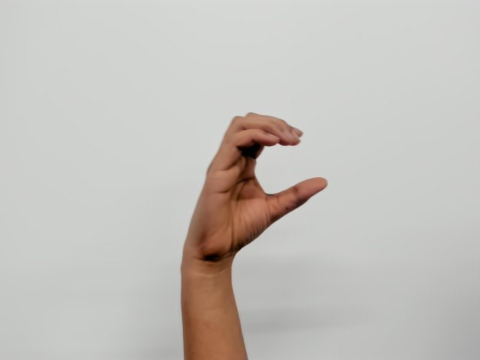

z-25 (1).jpg


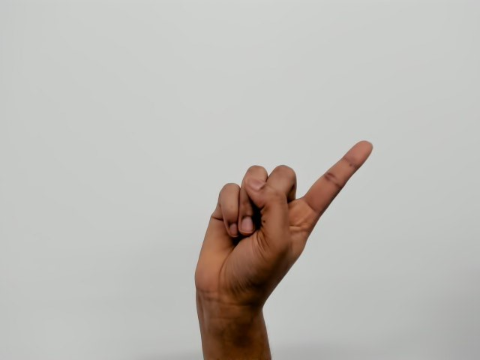

z-24 (1).jpg


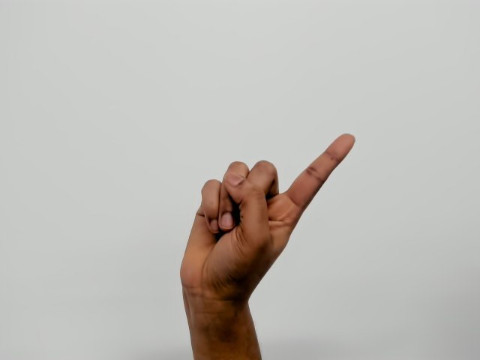

a-2 (1).jpg


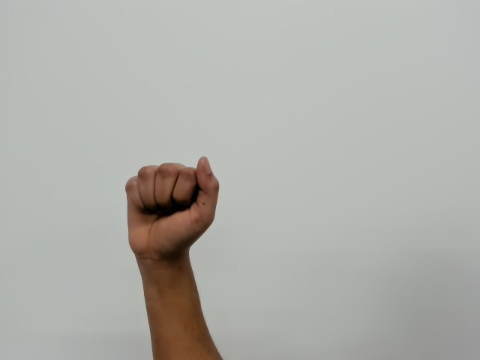

a-1 (1).jpg


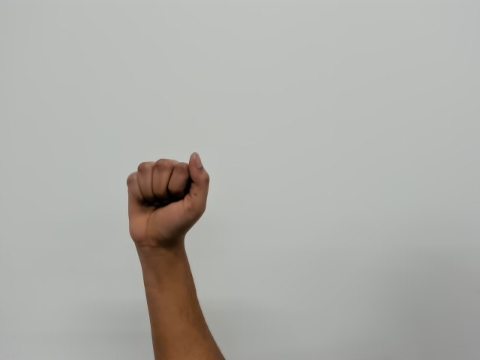

In [13]:
from matplotlib import pyplot as plt
import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2

plt.rcParams.update({
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'xtick.labelbottom': False,
    'xtick.bottom': False,
    'ytick.labelleft': False,
    'ytick.left': False,
    'xtick.labeltop': False,
    'xtick.top': False,
    'ytick.labelright': False,
    'ytick.right': False
})

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles


def display_one_image(image, title, subplot, titlesize=16):
    """Displays one image along with the predicted category name and score."""
    plt.subplot(*subplot)
    plt.imshow(image)
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize), color='black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)


def display_batch_of_images_with_gestures_and_hand_landmarks(images, results):
    """Displays a batch of images with the gesture category and its score along with the hand landmarks."""
    # Images and labels.
    images = [image.numpy_view() for image in images]
    gestures = [top_gesture for (top_gesture, _) in results]
    multi_hand_landmarks_list = [multi_hand_landmarks for (_, multi_hand_landmarks) in results]

    # Auto-squaring: this will drop data that does not fit into square or square-ish rectangle.
    rows = int(math.sqrt(len(images)))
    cols = len(images) // rows

    # Size and spacing.
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols, 1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))

    # Display gestures and hand landmarks.
    for i, (image, gestures) in enumerate(zip(images[:rows*cols], gestures[:rows*cols])):
        title = f"{gestures.category_name} ({gestures.score:.2f})"
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols) * 40 + 3
        annotated_image = image.copy()

        for hand_landmarks in multi_hand_landmarks_list[i]:
          hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
          hand_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
          ])

          mp_drawing.draw_landmarks(
            annotated_image,
            hand_landmarks_proto,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

        subplot = display_one_image(annotated_image, title, subplot, titlesize=dynamic_titlesize)

    # Layout.
    plt.tight_layout()
    plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()

import cv2

from google.colab.patches import cv2_imshow
import math

DESIRED_HEIGHT = 640
DESIRED_WIDTH = 480

def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)


# Preview the images.
images = {name: cv2.imread(name) for name in IMAGE_FILENAMES}
for name, image in images.items():
  print(name)
  resize_and_show(image)


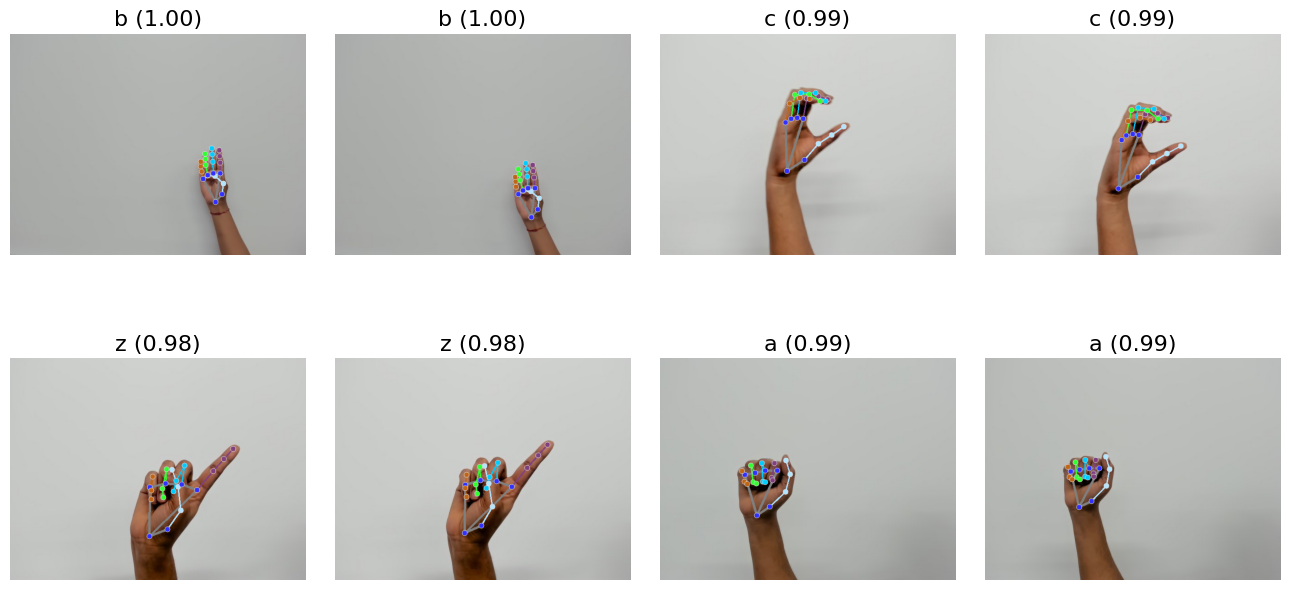

In [14]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an GestureRecognizer object.
base_options = python.BaseOptions(model_asset_path='ASL_alphabets.task')
options = vision.GestureRecognizerOptions(base_options=base_options)
recognizer = vision.GestureRecognizer.create_from_options(options)

images = []
results = []
for image_file_name in IMAGE_FILENAMES:
  # STEP 3: Load the input image.
  image = mp.Image.create_from_file(image_file_name)

  # STEP 4: Recognize gestures in the input image.
  recognition_result = recognizer.recognize(image)

  # STEP 5: Process the result. In this case, visualize it.
  images.append(image)
  top_gesture = recognition_result.gestures[0][0]
  hand_landmarks = recognition_result.hand_landmarks
  results.append((top_gesture, hand_landmarks))

display_batch_of_images_with_gestures_and_hand_landmarks(images, results)